In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.lines import Line2D
import seaborn as sns


df = pd.read_csv("Iris.csv").drop(["Id"], axis=1)

df = df.map(lambda element: pd.NA if element in ['', ' ', None] else element)
undefined_data = round((df.isna().any(axis=1).sum() / df.size) * 100, 3)

class_names = df["Species"].unique().tolist()
objects_in_classes = df["Species"].value_counts().to_list()

col_labels = ["Size", "Features", "Classes"] + class_names + ["Undefined objects"]
cells = [[df["Species"].size, 4, len(class_names)] + objects_in_classes + [undefined_data]]
dataset_info = pd.DataFrame(cells, columns=col_labels)

print(dataset_info)

   Size  Features  Classes  Iris-setosa  Iris-versicolor  Iris-virginica  \
0   150         4        3           50               50              50   

   Undefined objects  
0                0.0  


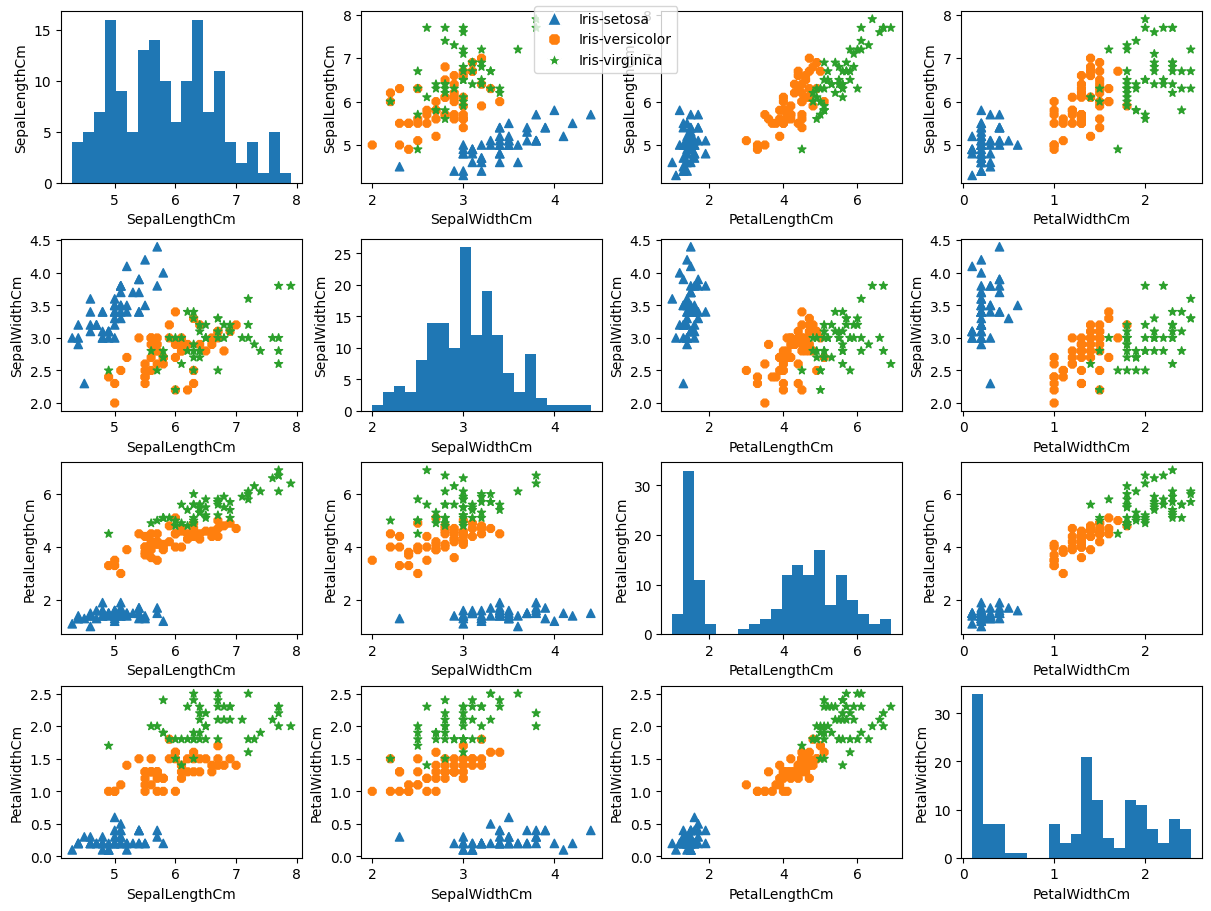

In [31]:
SPLIT_FREQ = 20


def draw_correlations(df: pd.DataFrame, class_colors: list, class_markers: list, 
                      feature_names: list, objects_in_classes: list) -> plt.Figure:
    fig, axs = plt.subplots(4, 4, layout="constrained", figsize=[12, 9])
    for i, feature_name in enumerate(feature_names):
        for j, next_feature_name in enumerate(feature_names):
            curr_ax = axs[i, j]
            if i == j:
                curr_ax.set_xlabel(next_feature_name)
                curr_ax.set_ylabel(feature_name)
                curr_ax.hist(df[feature_name].to_numpy(), bins=SPLIT_FREQ)
            else:
                curr_ax.set_xlabel(next_feature_name)
                curr_ax.set_ylabel(feature_name)
                beg_of_split = 0
                end_of_split = 0
                for k, objects_in_class in enumerate(objects_in_classes):
                    end_of_split += objects_in_class
                    x = features_as_list[next_feature_name][beg_of_split:end_of_split]
                    y = features_as_list[feature_name][beg_of_split:end_of_split]
                    curr_ax.scatter(x, y, c=class_colors[k], marker=class_markers[k])
                    beg_of_split += objects_in_class
    return fig


legend_elements = list()
class_colors = list()
class_markers = list()
for i, class_name in enumerate(class_names):
    color_code = f"C{i}"
    class_colors.append(np.repeat(color_code, objects_in_classes[i]))
    class_markers.append(MarkerStyle.filled_markers[(i + 1) * 3])
    legend_elements.append(Line2D([], [], 
                                  marker=class_markers[i], 
                                  color="w", 
                                  markerfacecolor=color_code,
                                  markersize=10, 
                                  label=class_name),)

feature_names = df.columns[:-1].to_list()
features_as_list = dict()
for feature_name in feature_names:
    features_as_list[feature_name] = df[feature_name].to_list()

corr_fig = draw_correlations(df, class_colors, class_markers, feature_names, objects_in_classes)
corr_fig.legend(handles=legend_elements, loc="upper center")
plt.show()
plt.close(corr_fig)

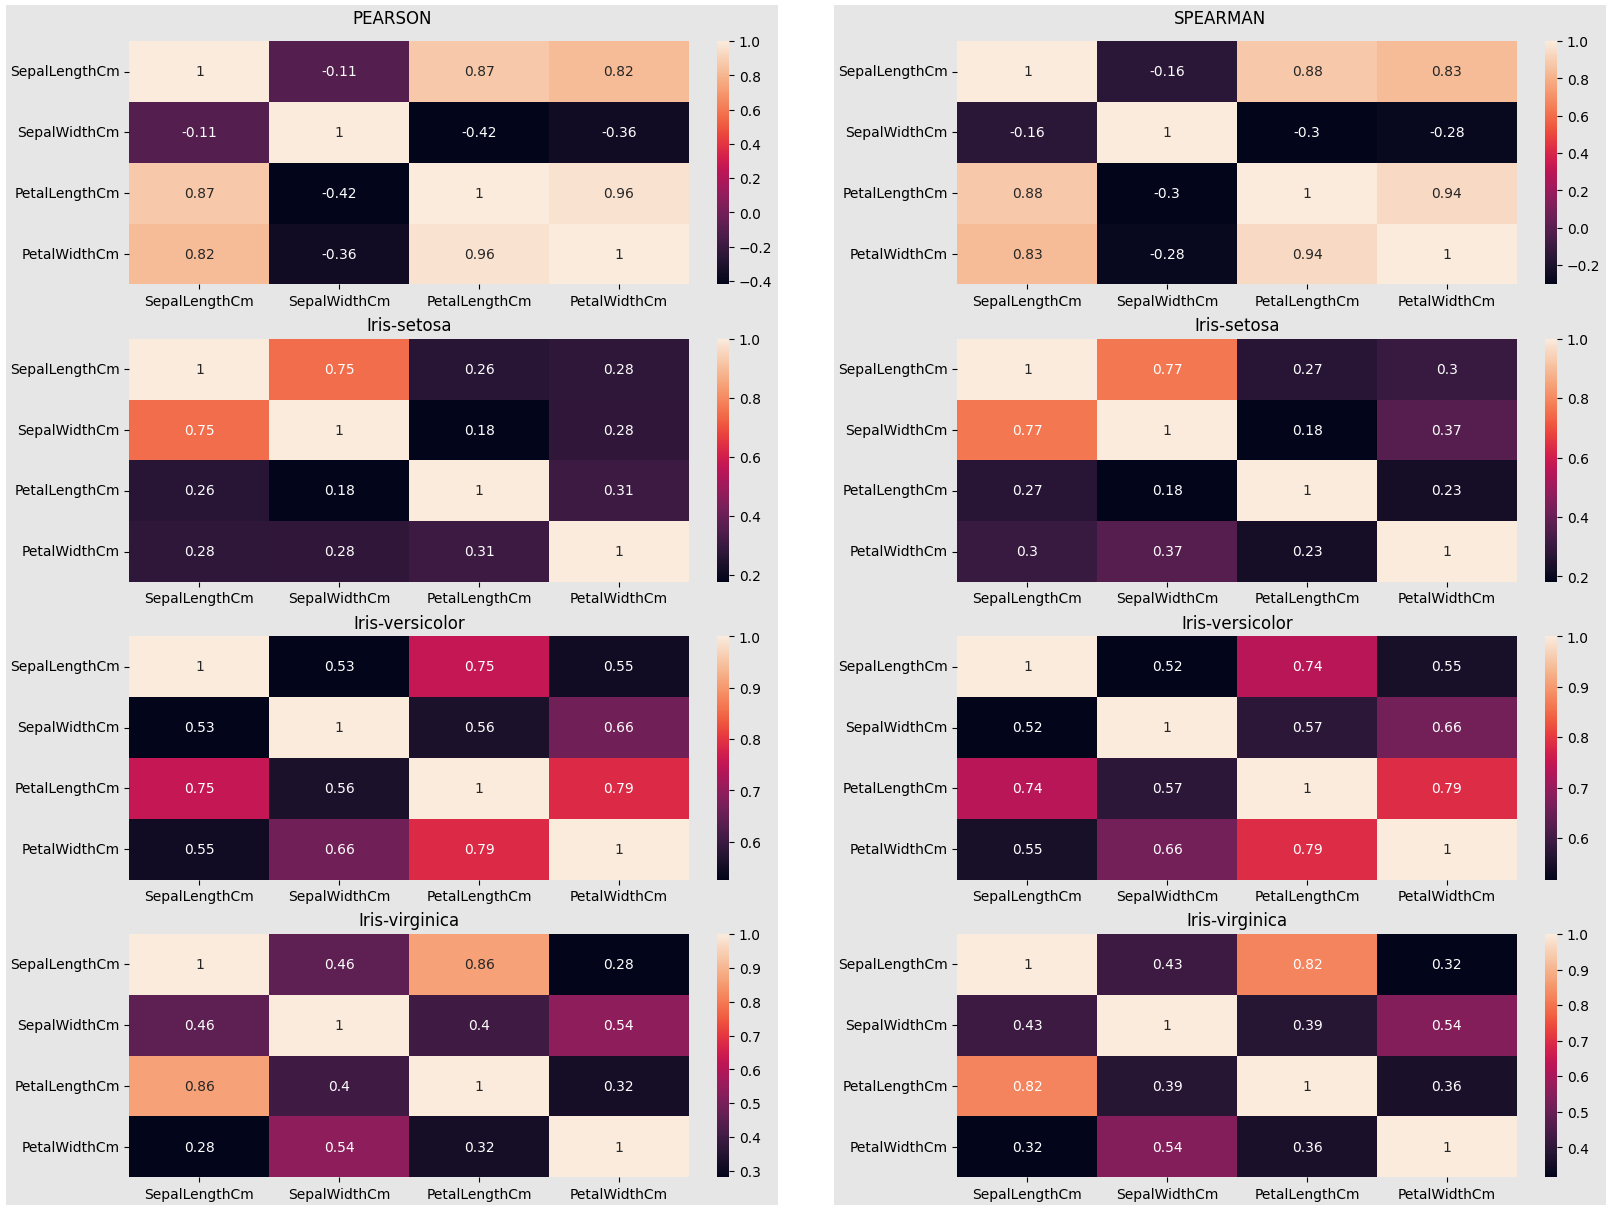

In [ ]:
def draw_corr_matrix(df: pd.DataFrame, ax: plt.Axes, method: str):
    corr = df.corr(method)
    sns.heatmap(corr, annot=True, ax=ax)


def draw_corr_matrices(df: pd.DataFrame, class_names: list) -> plt.Figure:
    all_objects = df.drop(["Species"], axis=1)
    objects_by_class = dict()
    for class_name in class_names:
        objects_by_class[class_name] = df[df["Species"] == class_name].drop(["Species"], axis=1)

    fig = plt.figure(layout="constrained", figsize=[16, 12])
    subfigs = fig.subfigures(1, 2, wspace=0.07)
    for i, method in enumerate(["pearson", "spearman"]):
        subfigs[i].suptitle(method.upper())
        subfigs[i].set_facecolor("0.9")
        axs = subfigs[i].subplots(4, 1)
        draw_corr_matrix(all_objects, axs[0], method)
        for j, class_name in enumerate(class_names):
            draw_corr_matrix(objects_by_class[class_name], axs[j + 1], method)
            axs[j + 1].set_title(class_name)

    return fig


corr_matrices_fig = draw_corr_matrices(df, class_names)
plt.show(corr_matrices_fig)
plt.close(corr_matrices_fig)